### **Import Required Libraries**

In [32]:
# Data handling and preprocessing
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Save model
import joblib
import os


### **Load & Explore the Dataset**

In [33]:
# Load the PIMA Indian Diabetes Dataset
df = pd.read_csv('diabetes.csv')

In [34]:
# Show info and structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [35]:
# Show first few rows
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [36]:
# Show summary statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### **Handle Missing Values and Normalize**

In [37]:
# Replace 0 with NaN for columns where 0 is not a valid value
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

In [38]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [39]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [40]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Train Models (Logistic Regression & Random Forest)**

In [41]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### **Evaluate Both Models**

In [44]:
# Function to print evaluation metrics
def evaluate(model):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
evaluate(log_model)

# Evaluate Random Forest
print("\nRandom Forest Metrics:")
evaluate(rf_model)

Logistic Regression Metrics:
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
Confusion Matrix:
 [[82 17]
 [21 34]]

Random Forest Metrics:
Accuracy: 0.7662337662337663
Precision: 0.6557377049180327
Recall: 0.7272727272727273
F1 Score: 0.6896551724137931
Confusion Matrix:
 [[78 21]
 [15 40]]


### **Visualize the Data**

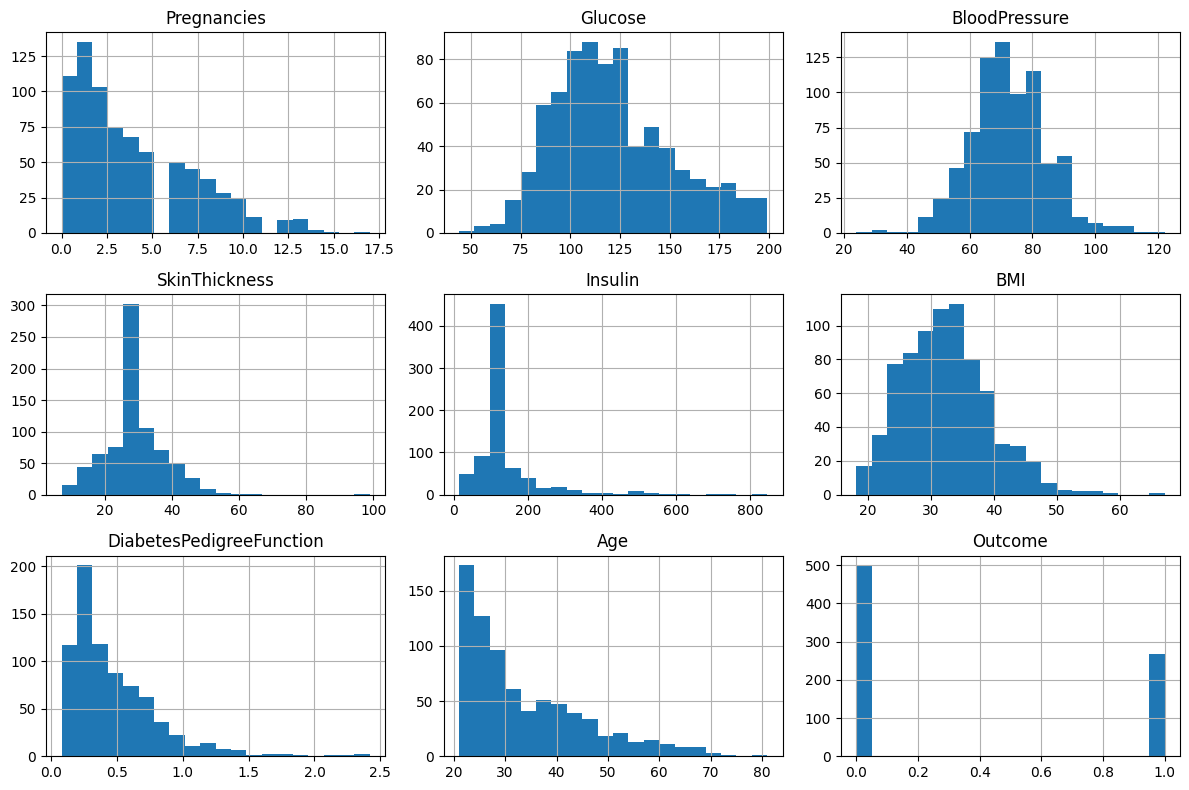

In [45]:
# Feature distributions
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

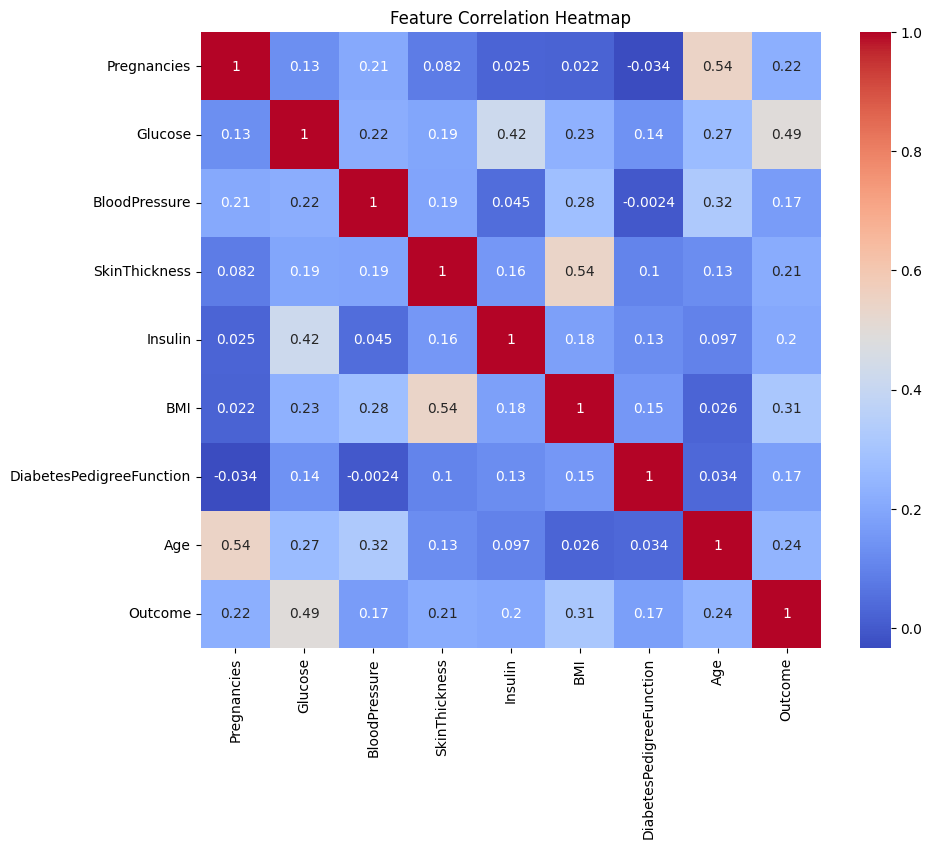

In [46]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### **Save the Best Model and Scaler for Deployment**

In [47]:
# Create model directory
os.makedirs('flask_app/model', exist_ok=True)

# Save the trained Random Forest model
joblib.dump(rf_model, 'flask_app/model/model.pkl')

# Save the fitted scaler
joblib.dump(scaler, 'flask_app/model/scaler.pkl')

['flask_app/model/scaler.pkl']

**Final Model Selection**

We trained both Logistic Regression and Random Forest classifiers. After comparing metrics such as accuracy, precision, recall and F1-score, we found that the Random Forest model performed better overall.

Hence, we saved and deployed the Random Forest model (model.pkl) along with the corresponding scaler (scaler.pkl) for real-time prediction in our Flask application.